## INTRODUCTION




### USEFUL READS AND LINKS

https://www.kaggle.com/datasets?tags=13204-NLP

## PROJECT LINKS ##

**Git Repo**

https://github.com/ArslanAbakarov/nlp_sentiment

**Deployed app**

https://aabakarov.shinyapps.io/sentiment_nlp/

**Video presentation**

https://youtu.be/810NV9mbMJE

**The dataset**

https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis/data

**NLP pipeline**

https://www.kaggle.com/code/suvroo/complete-nlp-pipeline



### PIPELINE

Business problem => Analytical Problem => Assemble Model Dataset

Data Exploration => Outliers, Missing Values, Duplicates, ???

Transformations

Dummy Encoding

Feature Selection

Train

Test


### DESCRIPTION



[link text](https://)## INSTALL LIBRARIES ETC

Uninstall if Pycaret 3 was installed

In [ ]:
!pip uninstall pycaret

Setting up PyCaret 2 which had NLP module

In [ ]:
# INSTALL PYCARET
!pip install pycaret==2.3.10

# !pip install pycaret
# !pip install pycaret[full]
# !pip install scipy==1.9.3

  Using cached pycaret-2.3.10-py3-none-any.whl.metadata (12 kB)
  Using cached scipy-1.5.4.tar.gz (25.2 MB)
  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Installing build dependencies ... error
error: subprocess-exited-with-error

× pip subprocess to install build dependencies did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


### (optional) CHECK AVAILABLE HARDWARE (if running locally)

In [ ]:
import psutil
import os
import subprocess

# CPU Info
# cpu_info = subprocess.run(["lscpu"], capture_output=True, text=True)
# print("CPU Info:")
# print(cpu_info.stdout)

cpu_freq = subprocess.run("lscpu | grep 'Model name:'", shell=True, capture_output=True, text=True)
print("Model name:", cpu_freq.stdout.split(':')[1].strip())

# RAM Info
ram = psutil.virtual_memory()
print("\nRAM Info:")
print(f"Total RAM: {ram.total / (1024 ** 3):.2f} GB")
print(f"Available RAM: {ram.available / (1024 ** 3):.2f} GB")

Model name: Intel(R) Xeon(R) CPU @ 2.20GHz

RAM Info:
Total RAM: 12.67 GB
Available RAM: 11.33 GB


## IMPORT DATASET

> Add blockquote




### **IF USING IN GOOGLE CLOUD**

In [ ]:
# LOAD DATASET and Dependencies
import os
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.graphics.mosaicplot as mp

from google.colab import drive

drive.mount('/content/gdrive', force_remount=True)
g_drive = 'gdrive/My Drive/'

# MAKE SURE YOU HAVE ML FOLDER AND THIS FILE IN IT FOR IT TO WORK
file_path = 'ML/twitter_training.csv'

df_path = os.path.join(g_drive, file_path)  #change dir to your project folder
full_df = pd.read_csv(df_path)

# OUTPUT DF
full_df

Mounted at /content/gdrive


,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


### **IF USING LOCAL ENVIROMENT CONNECTION (need Jupiter Notebook installed)**

You need to install Jupiter Notebook. I recommend using WSL on Windows.

$ pip install jupyterlab

$ pip install jupyter_server

$ pip install notebook==6.5.6

---

$ jupyter notebook     --NotebookApp.allow_origin='https://colab.research.google.com'     --port=8888     --NotebookApp.port_retries=0

OR

$ python -m notebook

In [ ]:
# LOAD DATASET FOR LOCAL ENVIRONMENT

import os
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.graphics.mosaicplot as mp

file_path = '/mnt/c/ML/twitter_training.csv'
# file_path = "/Users/aabakarov/ML/twitter_training.csv"

full_df = pd.read_csv(file_path)

# rename columns as id, game, sentiment, review
full_df.columns = ['id', 'game', 'sentiment', 'review']

# OUTPUT DF
# did it load?
full_df

,id,game,sentiment,review
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


### TAKE FRACTION for start if needed

In [ ]:
df = full_df.sample(frac=1, random_state=42)
df.shape

(74681, 4)

In [ ]:
# save the working dataset
# df.to_csv('/mnt/c/ML/', index=False)

In [ ]:
# import pycaret#
import pycaret
pycaret.__version__

'3.3.2'

## DATA EXPLORATION


### Let's begin

In [ ]:
df

,id,game,sentiment,review
34877,6792,Fortnite,Irrelevant,went to go in george's room to find his door w...
21704,4115,CS-GO,Positive,Yo this looks LIT! Team:GO/Overwatch combo
47008,5665,HomeDepot,Negative,Pay attention executive administrators. While ...
7969,9369,Overwatch,Irrelevant,Guy looked at me and says my name was put on t...
454,2476,Borderlands,Positive,one
...,...,...,...,...
37194,8379,Microsoft,Neutral,Microsoft opens data on the threat of the coro...
6265,278,Amazon,Neutral,"Fast, exciting, and unique! Take a copy of Mur..."
54886,2225,CallOfDuty,Negative,what fr this wit a warzone if you beefing dont...
860,2552,Borderlands,Negative,borderlands 3 sucks why are yall giving money ...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74681 entries, 34877 to 15795
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         74681 non-null  int64 
 1   game       74681 non-null  object
 2   sentiment  74681 non-null  object
 3   review     73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.8+ MB


In [ ]:
df.describe()

,id
count,74681.000000
mean,6432.640149
std,3740.423819
min,1.000000
25%,3195.000000
50%,6422.000000
75%,9601.000000
max,13200.000000


In [ ]:
## FIRST 100 entries
df.head(100)

,id,game,sentiment,review
34877,6792,Fortnite,Irrelevant,went to go in george's room to find his door w...
21704,4115,CS-GO,Positive,Yo this looks LIT! Team:GO/Overwatch combo
47008,5665,HomeDepot,Negative,Pay attention executive administrators. While ...
7969,9369,Overwatch,Irrelevant,Guy looked at me and says my name was put on t...
454,2476,Borderlands,Positive,one
...,...,...,...,...
50628,6291,FIFA,Positive,It is not the first time that the EU Commissio...
3882,1871,CallOfDutyBlackopsColdWar,Positive,"Snipers, thank goodness, look slick on Blackop..."
47051,5673,HomeDepot,Positive,Depot hot dogs are second best to Red Run Golf...
44110,10375,PlayerUnknownsBattlegrounds(PUBG),Irrelevant,"If.. Not good ones for @MiIndiaSupport, why"


### VALUES EXPLORATION

sentiment
Negative      0.301844
Positive      0.278933
Neutral       0.245283
Irrelevant    0.173940
Name: proportion, dtype: float64
sentiment
Negative      22542
Positive      20831
Neutral       18318
Irrelevant    12990
Name: count, dtype: int64


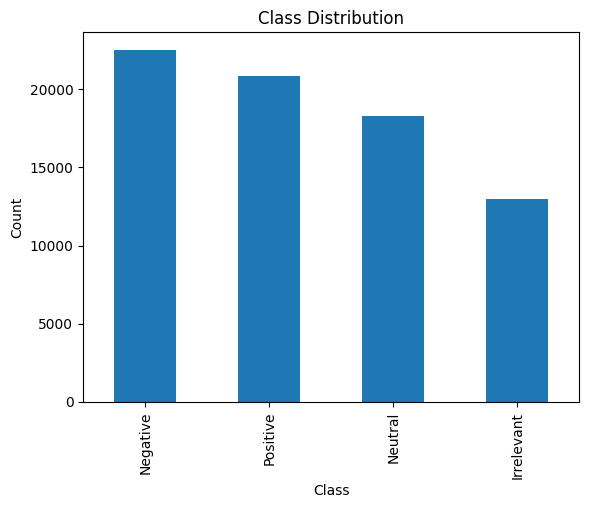

In [ ]:
# SENTIMENT
class_proportions = df['sentiment'].value_counts(normalize=True)
print(class_proportions)

target_values = pd.Series(df['sentiment']).value_counts()
print(target_values)

df['sentiment'].value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

#### product_name (values and plots)

In [ ]:
values = pd.Series(df['game']).value_counts()
print(values)

game
TomClancysRainbowSix                 2400
MaddenNFL                            2400
Microsoft                            2400
LeagueOfLegends                      2394
CallOfDuty                           2394
Verizon                              2382
ApexLegends                          2376
CallOfDutyBlackopsColdWar            2376
Facebook                             2370
Dota2                                2364
WorldOfCraft                         2364
NBA2K                                2352
TomClancysGhostRecon                 2346
Battlefield                          2346
FIFA                                 2340
Xbox(Xseries)                        2334
Overwatch                            2334
johnson&johnson                      2328
Amazon                               2316
PlayStation5(PS5)                    2310
HomeDepot                            2310
Cyberpunk2077                        2304
CS-GO                                2304
GrandTheftAuto(GTA)          

<Figure size 4000x4000 with 0 Axes>

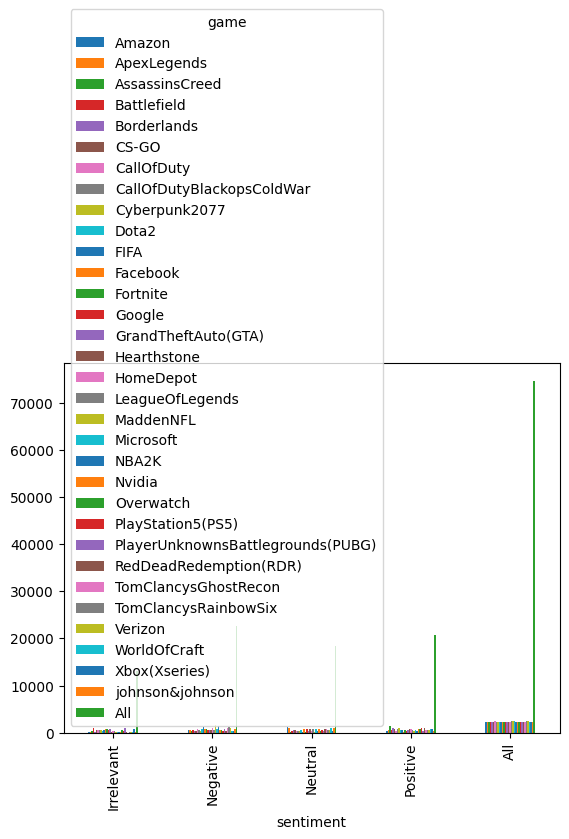

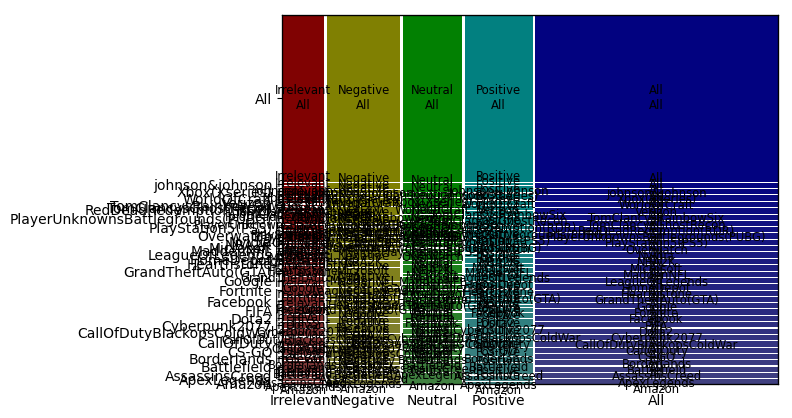

In [ ]:
import pandas as pd

# df['product_name'].value_counts().plot(kind='bar')
# plt.title('Class Distribution')
# plt.xlabel('Class')
# plt.ylabel('Count')
# plt.show()

# class_proportions = df['product_name'].value_counts(normalize=True)
# print(class_proportions)

## Heart crosstab with Diabetes
plt.figure(figsize=(40, 40))
crosstab = pd.crosstab(df.sentiment, df.game, margins=True)
crosstab.plot.bar();
plt.show()
mp.mosaic(crosstab.stack());

### NULLS AND MISSING VALUES



<AxesSubplot: >

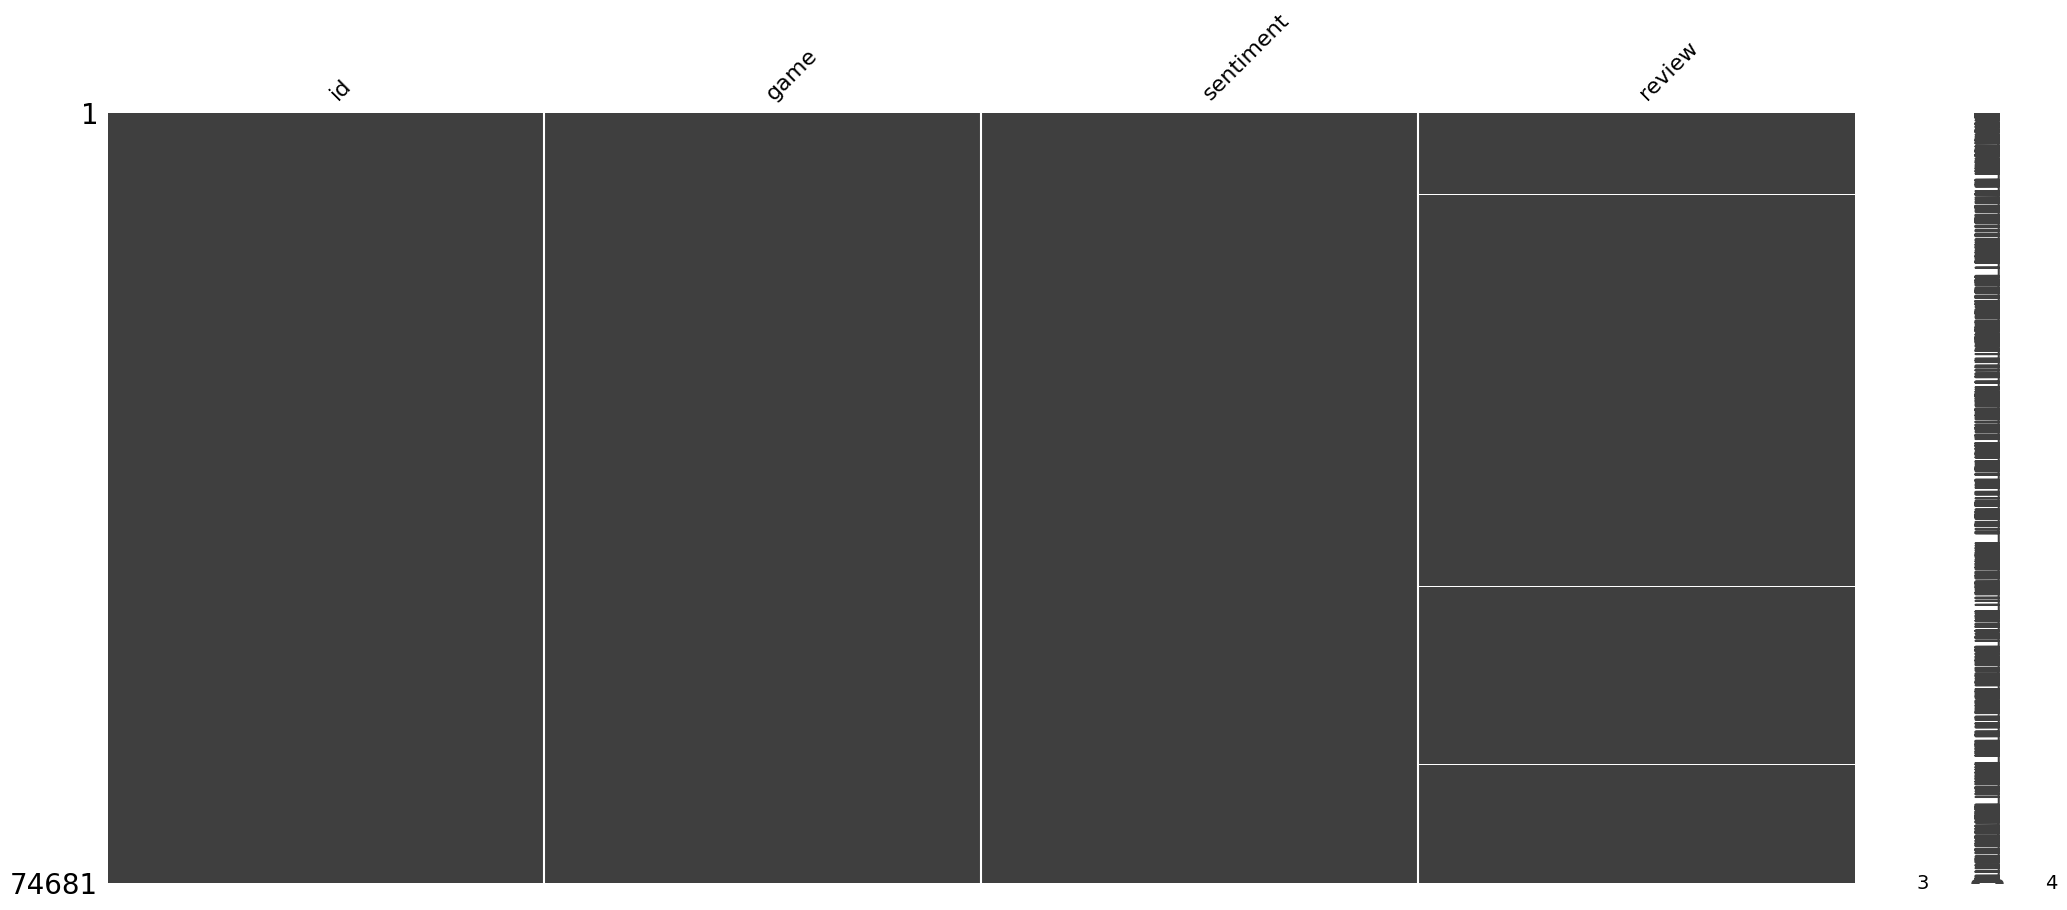

In [ ]:
# VISUALISE MISSING DATA 1
import missingno as msno
import seaborn as sns
msno.matrix(df)

# sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='Blues')
# we have no missing data in the dataset

In [ ]:
# CHECK FOR NULLS
df.isnull().sum()

# a lot of nulls in days_since_prior_order

id             0
game           0
sentiment      0
review       686
dtype: int64

In [ ]:
df = df.dropna(subset=['review'])
df.isnull().sum()

id           0
game         0
sentiment    0
review       0
dtype: int64

### OUTLIERS

k-means is very sensitive to outliers

In [ ]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
def outputOutliers(columnName):
  Q1 = np.percentile(df[columnName], 25)
  Q3 = np.percentile(df[columnName], 75)

  # Calculate the Interquartile Range (IQR)
  IQR = Q3 - Q1

  # Define outlier thresholds
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  # Find outliers
  outliers = df[(df[columnName] < lower_bound) | (df[columnName] > upper_bound)]

  print("Lower bound for " + columnName + ": " + str(lower_bound))
  print("Upper bound for " + columnName + ": " + str(upper_bound))

  # Display the outliers
  outliers_values = outliers[columnName].values
  print("Outliers for " + columnName + ":")
  print(outliers_values)

In [ ]:
df.columns

Index(['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_id', 'add_to_cart_order',
       'reordered', 'department_id', 'department', 'product_name',
       'is_first_order'],
      dtype='object')

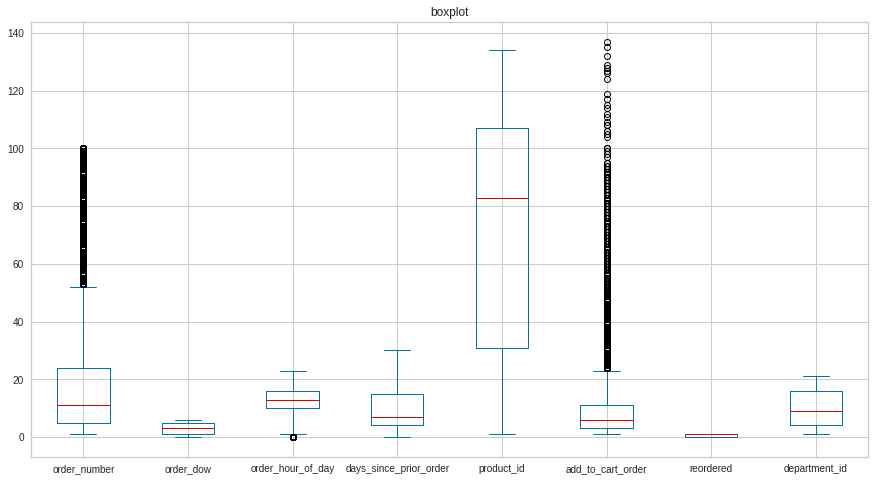

In [ ]:
ax = df[['order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order', 'product_id', 'add_to_cart_order', 'reordered', 'department_id' ]].plot(kind='box', title='boxplot', figsize=(15,8))

Lower bound for order_number: -23.5
Upper bound for order_number: 52.5
Outliers for order_number:
[78 82 64 ... 58 55 55]


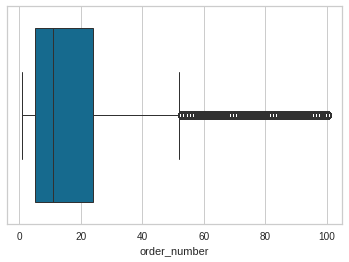

In [ ]:
# OUTLIERS
sns.boxplot(x=df['order_number'])
outputOutliers('order_number')

<Axes: xlabel='add_to_cart_order'>

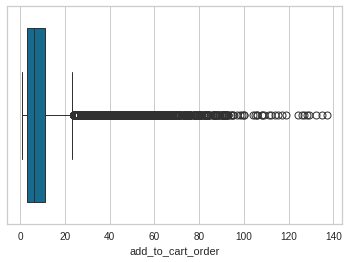

In [ ]:
# OUTLIERS
sns.boxplot(x=df['add_to_cart_order'])

Lower bound for order_hour_of_day: 1.0
Upper bound for order_hour_of_day: 25.0
Outliers for order_hour_of_day:
[0 0 0 ... 0 0 0]


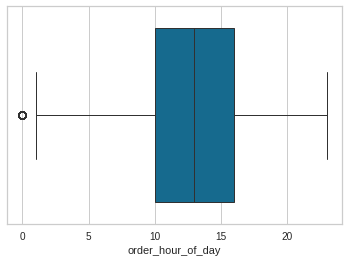

In [ ]:
# OUTLIERS
sns.boxplot(x=df['order_hour_of_day'])
outputOutliers('order_hour_of_day')

Lower bound for order_dow: -5.0
Upper bound for order_dow: 11.0
Outliers for order_dow:
[]


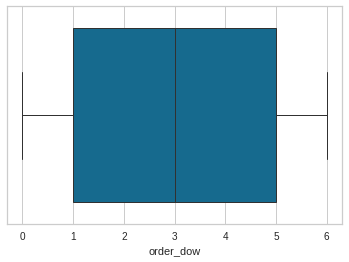

In [ ]:
# OUTLIERS
sns.boxplot(x=df['order_dow'])
outputOutliers('order_dow')

### DUPLICATES

In [ ]:
# CHECK FOR DUPLICATES
# should generally remove duplicates from your dataset
# Duplicates can artificially inflate model performance during training
# Removing duplicates reduces the dataset size, potentially speeding up data processing and model training times
# Duplicates can introduce inconsistencies if they contain slightly different values for the same entity, leading to conflicting information.

duplicates = df.duplicated()
print(df.duplicated().sum())

# NO DUPLICATES

2340


REMOVE DUPLICATES (no duplicates originally)

In [ ]:
# REMOVE DUPLICATES
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())

0


## NLP (1) (FINAL) Decision Trees (Best Results)

### Load data

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

In [ ]:
## Mount google drive
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

# Load the training and validation datasets
train_file_path = '/content/drive/MyDrive/ML/twitter_training.csv'
valid_file_path = '/content/drive/MyDrive/ML/twitter_validation.csv'


In [ ]:
train_file_path = '/mnt/c/ML/twitter_training.csv'
valid_file_path = '/mnt/c/ML/twitter_validation.csv'

In [ ]:
import pandas as pd

# Load the datasets
train_data = pd.read_csv(train_file_path, names=['Id', 'Company', 'Sentiment', 'Tweet'])
valid_data = pd.read_csv(valid_file_path, names=['Id', 'Company', 'Sentiment', 'Tweet'])


### Data Exploration

Missing values in each column:
Id             0
Company        0
Sentiment      0
Tweet        686
dtype: int64
Sentiment distribution:
Sentiment
Negative      22542
Positive      20832
Neutral       18318
Irrelevant    12990
Name: count, dtype: int64
Number of missing tweets: 686


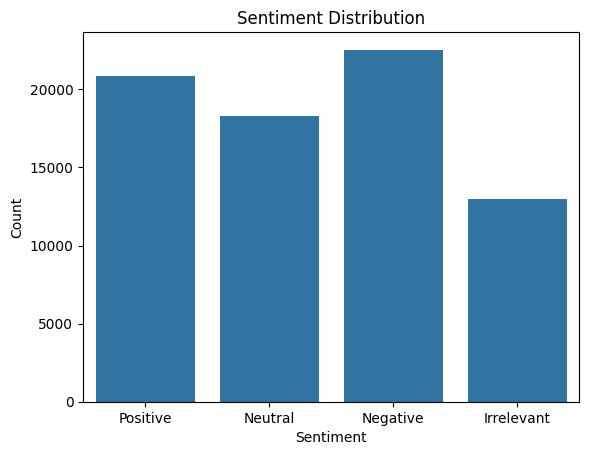

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset with specified column names
train_data.head() # display first 5 rows
train_data.tail() # display last 5 rows

train_data['Sentiment'].value_counts()

# Check for missing values
print("Missing values in each column:")
print(train_data.isnull().sum())

# Understand the sentiment distribution
print("Sentiment distribution:")
print(train_data['Sentiment'].value_counts())

# Check for missing values in 'Tweet' column
missing_tweets = train_data['Tweet'].isnull().sum()
print(f"Number of missing tweets: {missing_tweets}")

# Plot the sentiment distribution
# Visusalising sentiment distribution
sns.countplot(x='Sentiment', data=train_data)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

## Data Preprocessing
1. Clean data & Tokenization
2. Stopword Removal & Lemmatization

In [ ]:
import re
import string
import pandas as pd
from nltk.tokenize import word_tokenize

# Fill NaN values with empty strings and ensure all are strings
train_data['Tweet'] = train_data['Tweet'].fillna('').astype(str)
valid_data['Tweet'] = valid_data['Tweet'].fillna('').astype(str)

# Function to clean and tokenize text
def clean_text(text):
    # Remove URLs, mentions, hashtags, and punctuation, and convert to lowercase
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'@\w+', '', text)  # Remove mentions
    text = re.sub(r'#\w+', '', text)  # Remove hashtags
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuations
    text = text.lower()  # Convert to lowercase
    return word_tokenize(text)

# Tokenize the cleaned tweet content
train_data['tokenized'] = train_data['Tweet'].apply(clean_text)
valid_data['tokenized'] = valid_data['Tweet'].apply(clean_text)

In [ ]:
# # stopword removal

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK resources (only needed once)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Function to remove stopwords and apply lemmatization
def remove_stopwords_and_lemmatize(tokens):
    return [lemmatizer.lemmatize(word) for word in tokens if word.lower() not in stop_words]

# Apply stopword removal and lemmatization
train_data['tokenized_no_stopwords_lemmatized'] = train_data['tokenized'].apply(remove_stopwords_and_lemmatize)
valid_data['tokenized_no_stopwords_lemmatized'] = valid_data['tokenized'].apply(remove_stopwords_and_lemmatize)

# Display the processed data
print(train_data[['tokenized', 'tokenized_no_stopwords_lemmatized']].head())



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                           tokenized  \
0  [im, getting, on, borderlands, and, i, will, m...   
1  [i, am, coming, to, the, borders, and, i, will...   
2  [im, getting, on, borderlands, and, i, will, k...   
3  [im, coming, on, borderlands, and, i, will, mu...   
4  [im, getting, on, borderlands, 2, and, i, will...   

      tokenized_no_stopwords_lemmatized  
0     [im, getting, borderland, murder]  
1                [coming, border, kill]  
2       [im, getting, borderland, kill]  
3      [im, coming, borderland, murder]  
4  [im, getting, borderland, 2, murder]  


## Feature Extraction

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(
    max_features=5000,  # Limit the number of features
    ngram_range=(1, 2),  # Use unigrams and bigrams
    stop_words='english'  # Additional stopword removal
)

# Join the tokens back into strings before applying TF-IDF
train_data['text_for_tfidf'] = train_data['tokenized_no_stopwords_lemmatized'].apply(lambda tokens: ' '.join(tokens))
valid_data['text_for_tfidf'] = valid_data['tokenized_no_stopwords_lemmatized'].apply(lambda tokens: ' '.join(tokens))

# Fit and transform the training data using the new 'text_for_tfidf' column
X_train_tfidf = tfidf_vectorizer.fit_transform(train_data['text_for_tfidf'])

# Transform the validation data using the new 'text_for_tfidf' column
X_valid_tfidf = tfidf_vectorizer.transform(valid_data['text_for_tfidf'])

# Convert to dense array (if needed)
X_train_tfidf_dense = X_train_tfidf.toarray()
X_valid_tfidf_dense = X_valid_tfidf.toarray()

print(f"Training TF-IDF shape: {X_train_tfidf.shape}")
print(f"Validation TF-IDF shape: {X_valid_tfidf.shape}")


Training TF-IDF shape: (74682, 5000)
Validation TF-IDF shape: (1000, 5000)


## Data Visualization

In [ ]:
# Get feature names and their corresponding TF-IDF scores

# X.sum(axis=0): Sums the TF-IDF scores for each feature across all documents.
# Creating tfidf_df: A DataFrame containing features and their aggregated TF-IDF scores.
# Sorting and Displaying: Shows the most important words based on TF-IDF scores.

#. A. Displaying Top TF-IDF Features
feature_names = tfidf_vectorizer.get_feature_names_out()
tfidf_scores = X_train_tfidf.sum(axis=0)

# Create a DataFrame of features and their TF-IDF scores
import numpy as np
tfidf_scores = np.array(tfidf_scores).flatten()
tfidf_df = pd.DataFrame({'feature': feature_names, 'tfidf_score': tfidf_scores})

# Sort the DataFrame by TF-IDF score in descending order
tfidf_df = tfidf_df.sort_values(by='tfidf_score', ascending=False)

# Display the top 20 features
print("Top 20 TF-IDF Features:")
print(tfidf_df.head(20))



Top 20 TF-IDF Features:
      feature  tfidf_score
1825     game  1485.026989
2298       im   933.899512
2621     like   896.050432
2735     love   875.931023
1971     good   812.408067
4014     shit   719.479883
4465     time   691.074014
3329     play   679.405283
1783     fuck   661.776058
3651   really   655.204007
516      best   646.654913
3019      new   641.116611
4650      unk   615.212372
2464  johnson   582.016187
2010      got   552.726045
1301     dont   543.393536
1796  fucking   542.081308
3241   people   536.320669
2033    great   533.976774
2699     look   521.186766


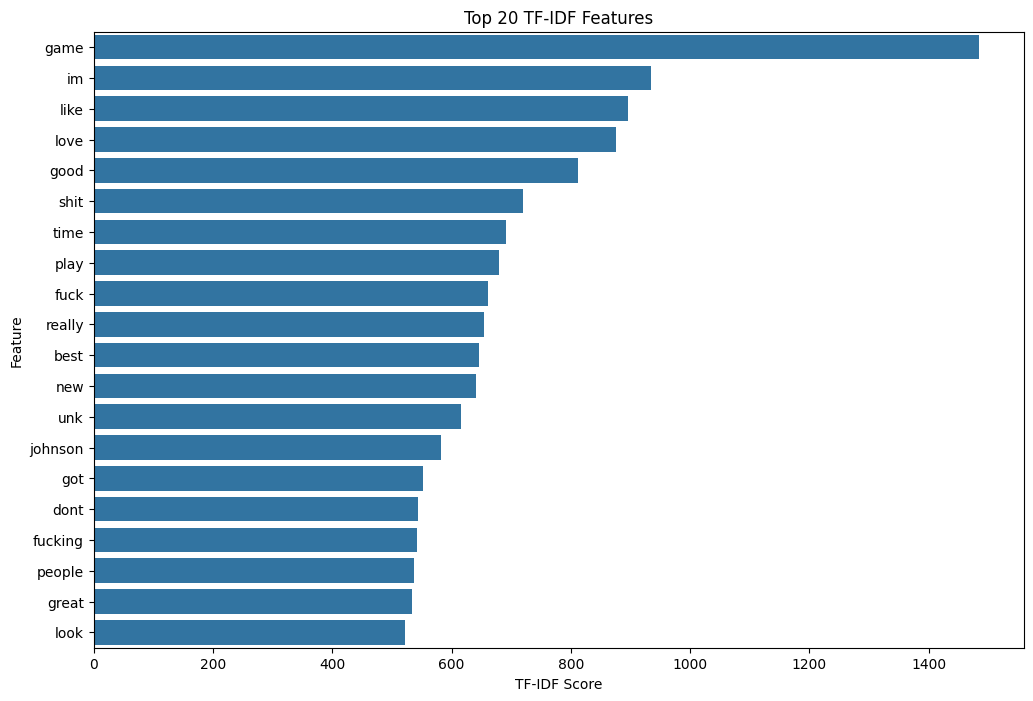

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing Top TF-IDF Features

# Plot the top 20 features
plt.figure(figsize=(12, 8))
sns.barplot(x='tfidf_score', y='feature', data=tfidf_df.head(20))
plt.title('Top 20 TF-IDF Features')
plt.xlabel('TF-IDF Score')
plt.ylabel('Feature')
plt.show()

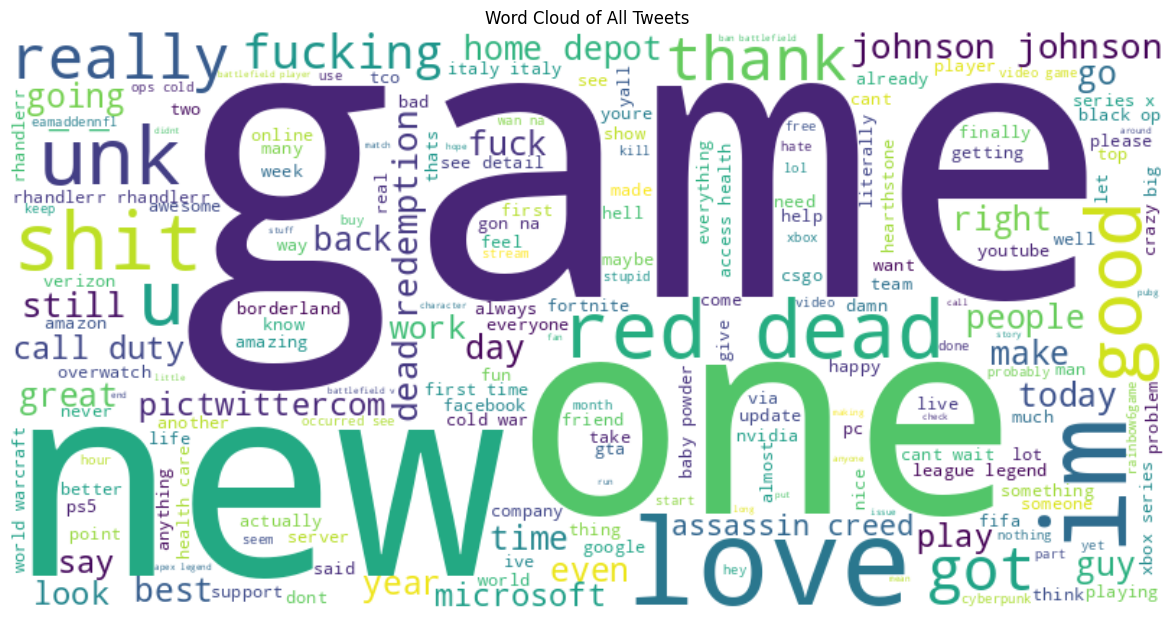

In [ ]:
# Word Cloud
from wordcloud import WordCloud

# Generating a word cloud

# Combine all cleaned tweets into one string
text = ' '.join(train_data['text_for_tfidf'] )

# Generate a word cloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(15, 7.5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of All Tweets')
plt.show()

## Create Model

In [ ]:
# Prepare labelled and unlabelled data
import numpy as np

train_data['Sentiment'] = train_data['Sentiment'].fillna(-1)
valid_data['Sentiment'] = valid_data['Sentiment'].fillna(-1)

# Encode sentiment as integers (positive = 1, negative = 0, and -1 for unlabeled)
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
# Handle -1 separately as LabelEncoder cannot handle it directly

# Ensure at least two classes in the training set
# Filter out rows with -1 in 'Positive' column before fitting LabelEncoder
train_data_labeled = train_data[train_data['Sentiment'] != -1]
label_encoder.fit(train_data_labeled['Sentiment'])

train_data['sentiment_encoded'] = train_data['Sentiment'].apply(lambda x: -1 if x == -1 else label_encoder.transform([x])[0])
valid_data['sentiment_encoded'] = valid_data['Sentiment'].apply(lambda x: -1 if x == -1 else label_encoder.transform([x])[0])

## Train semi supervised model

In [ ]:
# using SVM model
# Importing necessary modules
from sklearn.semi_supervised import SelfTrainingClassifier
from sklearn.svm import SVC

# Define the base classifier as SVM
base_classifier = SVC(kernel='linear', probability=True)  # Use 'linear' kernel for text; set `probability=True` for compatibility with SelfTrainingClassifier

# Initialize SelfTrainingClassifier with the SVM base classifier
self_training_model = SelfTrainingClassifier(base_classifier)

# Train the model
self_training_model.fit(X_train_tfidf, train_data['sentiment_encoded'])

/usr/local/lib/python3.10/dist-packages/sklearn/semi_supervised/_self_training.py:227: UserWarning: y contains no unlabeled samples
  warnings.warn("y contains no unlabeled samples", UserWarning)


SelfTrainingClassifier(base_estimator=LogisticRegression(max_iter=1000,
                                                         solver='saga'))

LABEL PROPAGATION (skip) (asked for 41 GB of RAM)

In [ ]:
from sklearn.semi_supervised import LabelPropagation

lp_model = LabelPropagation()
lp_model.fit(X_train_tfidf, train_data['sentiment_encoded'])

SVM TRAINING (skip, not in final)

In [ ]:
# using SVM model
# Importing necessary modules
from sklearn.semi_supervised import SelfTrainingClassifier
from sklearn.svm import SVC

# Define the base classifier as SVM
base_classifier = SVC(kernel='linear', probability=True)  # Use 'linear' kernel for text; set `probability=True` for compatibility with SelfTrainingClassifier

# Initialize SelfTrainingClassifier with the SVM base classifier
self_training_model = SelfTrainingClassifier(base_classifier)

# Train the model
self_training_model.fit(X_train_tfidf, train_data['sentiment_encoded'])

/home/arslanruslan/.local/lib/python3.10/site-packages/sklearn/semi_supervised/_self_training.py:227: UserWarning: y contains no unlabeled samples
  warnings.warn("y contains no unlabeled samples", UserWarning)


SelfTrainingClassifier(base_estimator=SVC(kernel='linear', probability=True))

DECISION TREE TRAINING (final)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.kernel_approximation import Nystroem
from sklearn.metrics import accuracy_score

# Approximate the RBF kernel using Nystroem on the training data
nystroem = Nystroem(kernel='rbf', n_components=300)  # Adjust n_components based on resources

# Fit and transform on training data
X_train_approx = nystroem.fit_transform(X_train_tfidf)

# Transform validation data with the same transformation
X_valid_approx = nystroem.transform(X_valid_tfidf)

# Use Decision Tree Classifier with approximated kernel features
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_approx, train_data['sentiment_encoded'])

# Predict on the validation set
y_pred = dt_model.predict(X_valid_approx)

# Calculate accuracy on the validation set
accuracy = accuracy_score(valid_data['sentiment_encoded'], y_pred)
print(f"Accuracy on validation set: {accuracy:.4f}")



Accuracy on validation set: 0.9100


In [ ]:
# save model
import pickle
pickle.dump(dt_model, open('/mnt/c/ML/a-dtmodel.pkl', 'wb'))

In [ ]:
# save vectorizer
import pickle
pickle.dump(nystroem, open('/mnt/c/ML/a-nystroem.pkl', 'wb'))

In [ ]:
X_valid_tfidf_to_predict = nystroem.transform(X_valid_tfidf)
y_pred = dt_model.predict(X_valid_tfidf_to_predict)
y_pred

array([0, 2, 1, 1, 2, 1, 3, 3, 3, 1, 3, 3, 1, 2, 1, 3, 3, 1, 3, 1, 1, 2,
       0, 1, 2, 3, 0, 0, 0, 1, 3, 3, 3, 3, 1, 2, 0, 0, 3, 2, 3, 2, 2, 2,
       3, 3, 1, 1, 1, 2, 3, 1, 1, 3, 3, 3, 3, 3, 1, 0, 1, 3, 3, 0, 3, 2,
       1, 0, 0, 1, 2, 1, 0, 1, 3, 0, 3, 0, 2, 2, 2, 3, 3, 2, 3, 2, 1, 0,
       1, 2, 2, 0, 3, 3, 0, 1, 1, 1, 2, 2, 2, 1, 3, 3, 2, 3, 2, 3, 1, 2,
       2, 3, 1, 2, 1, 2, 2, 3, 3, 2, 1, 1, 3, 1, 2, 2, 3, 3, 1, 2, 0, 3,
       2, 1, 3, 0, 2, 2, 0, 0, 0, 2, 2, 0, 0, 0, 3, 2, 2, 0, 3, 3, 2, 3,
       2, 0, 2, 1, 2, 3, 1, 2, 1, 0, 0, 0, 2, 3, 1, 1, 3, 3, 3, 2, 2, 3,
       0, 2, 2, 2, 3, 2, 1, 1, 2, 3, 3, 0, 0, 2, 3, 3, 2, 0, 3, 1, 1, 1,
       1, 3, 2, 2, 3, 3, 3, 3, 1, 3, 3, 0, 2, 0, 1, 2, 0, 3, 1, 1, 3, 1,
       3, 1, 3, 3, 1, 0, 0, 3, 3, 2, 3, 0, 2, 0, 0, 1, 2, 2, 3, 1, 0, 0,
       3, 3, 0, 0, 2, 3, 1, 1, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 2, 1, 3, 2,
       1, 3, 3, 0, 1, 2, 0, 3, 2, 0, 1, 2, 1, 3, 3, 1, 1, 1, 3, 1, 2, 3,
       2, 3, 1, 3, 1, 3, 1, 0, 2, 2, 3, 3, 2, 1, 0,

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Predict sentiments on the validation data using the trained model
predicted_sentiments = self_training_model.predict(X_valid_tfidf)

# Evaluate the model
print("Accuracy:", accuracy_score(valid_data['sentiment_encoded'], predicted_sentiments))
print("Classification Report:")
print(classification_report(valid_data['sentiment_encoded'], predicted_sentiments, target_names=label_encoder.classes_))

Accuracy: 0.793
Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.76      0.73      0.74       172
    Negative       0.75      0.88      0.81       266
     Neutral       0.89      0.70      0.78       285
    Positive       0.78      0.85      0.82       277

    accuracy                           0.79      1000
   macro avg       0.80      0.79      0.79      1000
weighted avg       0.80      0.79      0.79      1000



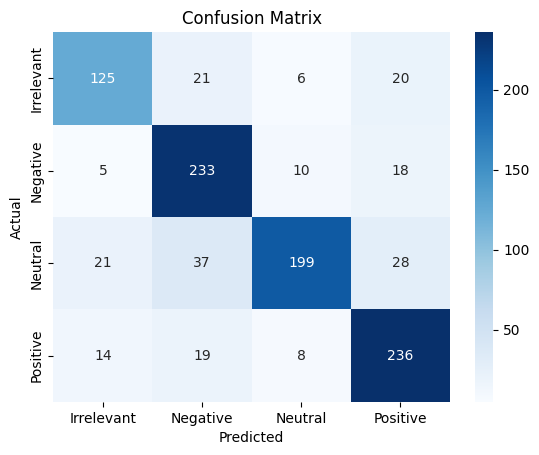

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix # Import the confusion_matrix function

# Predict sentiments on the validation data using the trained model
predicted_sentiments = self_training_model.predict(X_valid_tfidf)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(valid_data['sentiment_encoded'], predicted_sentiments) # Calculate and assign the confusion matrix

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## NLP (2) APPOACH (LogisticRegression)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#pandas: Used for data manipulation and analysis.
#seaborn and matplotlib.pyplot: Used for data visualization.

# Mount Google Drive to access the dataset
from google.colab import drive
drive.mount('/content/drive')

# LOAD THE DATASET

# Define the path to the dataset
train_data_path = '/content/drive/My Drive/ML/twitter_training.csv'

# Load dataset with specified column names
import pandas as pd
twitter_data = pd.read_csv(train_data_path, names=['Id', 'Company', 'Sentiment', 'Tweet'])
twitter_data.head() # display first 5 rows
twitter_data.tail() # display last 5 rows




Mounted at /content/drive


,Id,Company,Sentiment,Tweet
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...
74681,9200,Nvidia,Positive,Just like the windows partition of my Mac is l...


**Understanding the Code and Its Workflow**

**Data Loading and Exploration**
Objective: To load the dataset and get an initial understanding of its
structure and contents.
Key Actions:
Loaded the dataset from Google Drive.
Examined the data for missing values and class distribution.
Visualized the sentiment distribution to understand class imbalance.

**Data Preprocessing**

Objective: To clean the text data and prepare it for modeling.
Key Actions:
Removed irrelevant text components like URLs, mentions, and special characters.
Converted text to lowercase for consistency.
Tokenized the text to break it down into individual words.
Removed stopwords and applied stemming to reduce words to their root form.

**Feature Extraction**

Objective: To transform the textual data into numerical features that machine learning models can interpret.
Key Actions:
Used TF-IDF vectorization to represent the importance of words in the corpus.
Limited the feature space to the top 5000 words to manage dimensionality.
**Data Visualization**

Objective: To gain insights into the data and the features extracted.
Key Actions:
Displayed the top 20 features based on their TF-IDF scores.
Created a word cloud to visualize the most frequent words in the dataset.

**Model Training**

Objective: To train a machine learning model that can classify the sentiment of tweets.
Key Actions:
Initialized and trained a Logistic Regression model.
Also experimented with an SGDClassifier as an alternative.
Performed cross-validation to assess the model's performance.

**Model Evaluation**

Objective: To evaluate the trained model's performance and understand its predictive capabilities.
Key Actions:
Calculated cross-validation scores to estimate accuracy.
Generated a confusion matrix to visualize the model's performance across different classes.
Produced a classification report to obtain detailed metrics for each class.

**Model Interpretation**

Objective: To understand which features are most influential in the model's predictions.
Key Actions:
Extracted the model's coefficients to see the weight assigned to each feature.
Visualized the top features for each sentiment class using bar plots.

**Key Takeaways**

**Data Preprocessing is Crucial: Cleaning and preparing the data significantly impact the model's performance.**

Feature Engineering Matters: Choosing the right features and limiting the feature space helps in building efficient models.
Model Selection and Evaluation: Trying different models and evaluating them thoroughly ensures that you select the most suitable one for your task.
Interpretability: Understanding the model's decision-making process is essential, especially when dealing with text data.
Suggestions for Further Improvement

Experiment with Different Models: Try other algorithms like Support Vector Machines or Random Forests to see if they offer better performance.
Hyperparameter Tuning: Use techniques like Grid Search to find the optimal parameters for your models.
Handle Class Imbalance: If the sentiment classes are imbalanced, consider techniques like resampling or adjusting class weights.
Advanced NLP Techniques: Incorporate lemmatization, n-grams, or word embeddings for richer feature representations.
Model Deployment: Save your trained model and vectorizer for future use or deploy them in a real-world application.


In [ ]:
twitter_data['Sentiment'].value_counts()


,count
Sentiment,
Negative,22542
Positive,20832
Neutral,18318
Irrelevant,12990


In [ ]:
## lets do some formalities by checking size/ columns/ missing values

# Understand data dimensions
shape = twitter_data.shape
print(f"Rows in dataset are : {shape[0]}")
print(f"Columns in dataset are : {shape[1]}")

twitter_data.isnull().sum()

Rows in dataset are : 74682
Columns in dataset are : 4


,0
Id,0
Company,0
Sentiment,0
Tweet,686


Missing values in each column:
Id             0
Company        0
Sentiment      0
Tweet        686
dtype: int64
Sentiment distribution:
Sentiment
Negative      22542
Positive      20832
Neutral       18318
Irrelevant    12990
Name: count, dtype: int64
Number of missing tweets: 686


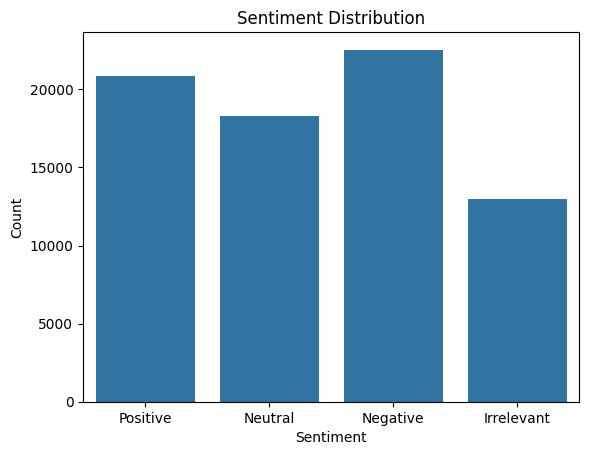

In [ ]:
# Check for missing values
print("Missing values in each column:")
print(twitter_data.isnull().sum())

# Understand the sentiment distribution
print("Sentiment distribution:")
print(twitter_data['Sentiment'].value_counts())

# Check for missing values in 'Tweet' column
missing_tweets = twitter_data['Tweet'].isnull().sum()
print(f"Number of missing tweets: {missing_tweets}")


# Plot the sentiment distribution
# Visusalising sentiment distribution
sns.countplot(x='Sentiment', data=twitter_data)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

### STEP 2 : DATA PREPOSSING


In [ ]:
# Drop rows with missing 'Tweet' values
# Handling missing values
twitter_data = twitter_data.dropna(subset=['Tweet'])


In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

#Importing libraries
#re: Regular expressions library for text manipulation.
#nltk: Natural Language Toolkit, used for various NLP tasks.
#stopwords: Common words that may not be useful for analysis (e.g., "the", "and").
#PorterStemmer: Algorithm for stemming words to their root form.
#ps: An instance of the PorterStemmer.
#stop_words: A set of English stopwords.

# Initialize stemmer and stopwords
ps = PorterStemmer()
stop_words = set(stopwords.words('english'))

# Defining the prepossing function

def preprocess_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+', '', text)
    # Remove mentions and hashtags
    text = re.sub(r'@\w+|#\w+', '', text)
    # Remove punctuation, numbers, and special characters
    text = re.sub(r'[^A-Za-z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize the text
    tokens = text.split()
    # Remove stopwords and apply stemming
    tokens = [ps.stem(word) for word in tokens if word not in stop_words]
    # Join tokens back into a single string
    return ' '.join(tokens)

# Apply preprocessing to the 'Tweet' column -- using the funciton above
# apply(preprocess_text): Applies the preprocessing function to each tweet.
# Adding 'Cleaned_Tweet' Column: Stores the preprocessed text for further analysis.
# Displaying the Results: Shows a comparison of original and cleaned tweets.

twitter_data['Cleaned_Tweet'] = twitter_data['Tweet'].apply(preprocess_text)

# Display the original and cleaned tweets
twitter_data[['Tweet', 'Cleaned_Tweet']].head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Tweet,Cleaned_Tweet
0,im getting on borderlands and i will murder yo...,im get borderland murder
1,I am coming to the borders and I will kill you...,come border kill
2,im getting on borderlands and i will kill you ...,im get borderland kill
3,im coming on borderlands and i will murder you...,im come borderland murder
4,im getting on borderlands 2 and i will murder ...,im get borderland murder


### FEATURE EXTRACTION : STEP 3

In [ ]:
# FEATURE extraction step 3
# Convert the cleaned text into numerical features using TF-IDF Vectorization.

#TF-IDF Vectorizer: Converts text data into numerical features based on word importance.
#max_features: Limits the number of features to the top 5000 words.
#X: Feature matrix.
#y: Target variable (Sentiment labels).

# Importing TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer with a maximum of 5000 features
# Initializing and Applying the Vectorizer

#max_features=5000: Limits the number of features to the top 5000 terms based on frequency.


vectorizer = TfidfVectorizer(max_features=5000)

#fit_transform: Learns the vocabulary and computes the TF-IDF matrix.
# Fit and transform the cleaned tweets
X = vectorizer.fit_transform(twitter_data['Cleaned_Tweet'])

# Extract the target variable
# y: Stores the sentiment labels corresponding to each tweet.
y = twitter_data['Sentiment']


### DATA VISUALISATION: STEP 4

In [ ]:
# Get feature names and their corresponding TF-IDF scores

# X.sum(axis=0): Sums the TF-IDF scores for each feature across all documents.
# Creating tfidf_df: A DataFrame containing features and their aggregated TF-IDF scores.
# Sorting and Displaying: Shows the most important words based on TF-IDF scores.

#. A. Displaying Top TF-IDF Features
feature_names = vectorizer.get_feature_names_out()
tfidf_scores = X.sum(axis=0)

# Create a DataFrame of features and their TF-IDF scores
import numpy as np
tfidf_scores = np.array(tfidf_scores).flatten()
tfidf_df = pd.DataFrame({'feature': feature_names, 'tfidf_score': tfidf_scores})

# Sort the DataFrame by TF-IDF score in descending order
tfidf_df = tfidf_df.sort_values(by='tfidf_score', ascending=False)

# Display the top 20 features
print("Top 20 TF-IDF Features:")
print(tfidf_df.head(20))


Top 20 TF-IDF Features:
     feature  tfidf_score
1782    game  1634.417012
3243    play  1214.893732
1752    fuck  1123.023979
2163      im   983.735217
2581    love   972.935397
1821     get   966.652391
2523    like   959.279376
1868    good   863.686694
1854      go   777.210782
3904    shit   748.096337
3026     one   737.618745
4437    time   720.251841
4363   thank   720.003206
2569    look   694.486274
3519  realli   693.720936
3831     see   673.625732
2916     new   659.727667
417     best   654.177285
643     cant   645.841788
4628     unk   617.416652


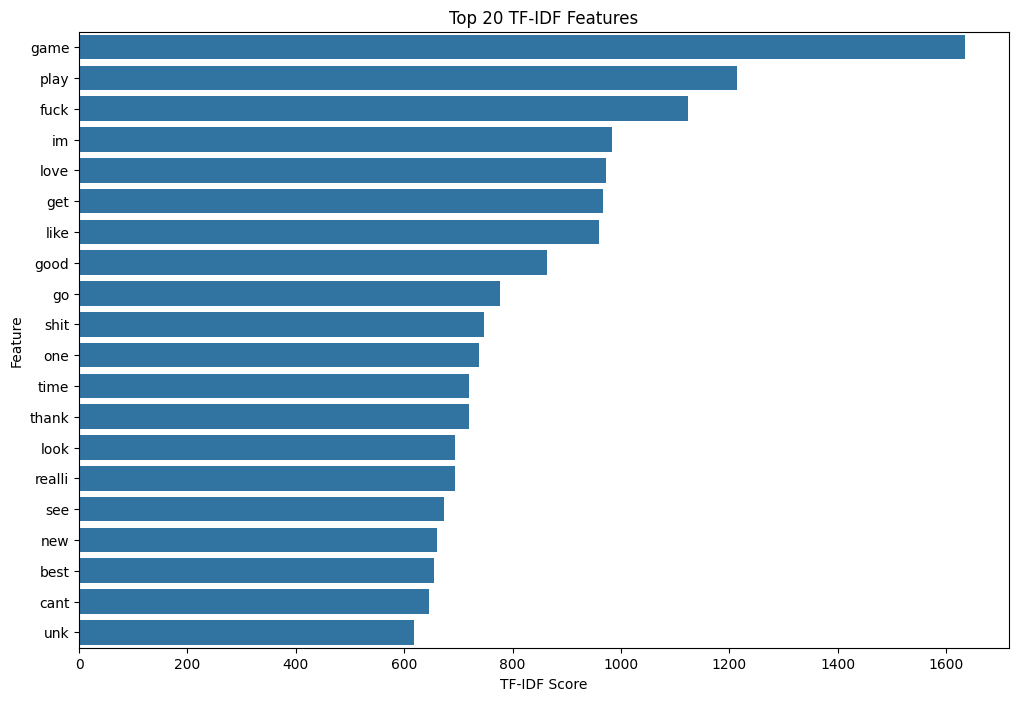

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing Top TF-IDF Features

# Plot the top 20 features
plt.figure(figsize=(12, 8))
sns.barplot(x='tfidf_score', y='feature', data=tfidf_df.head(20))
plt.title('Top 20 TF-IDF Features')
plt.xlabel('TF-IDF Score')
plt.ylabel('Feature')
plt.show()


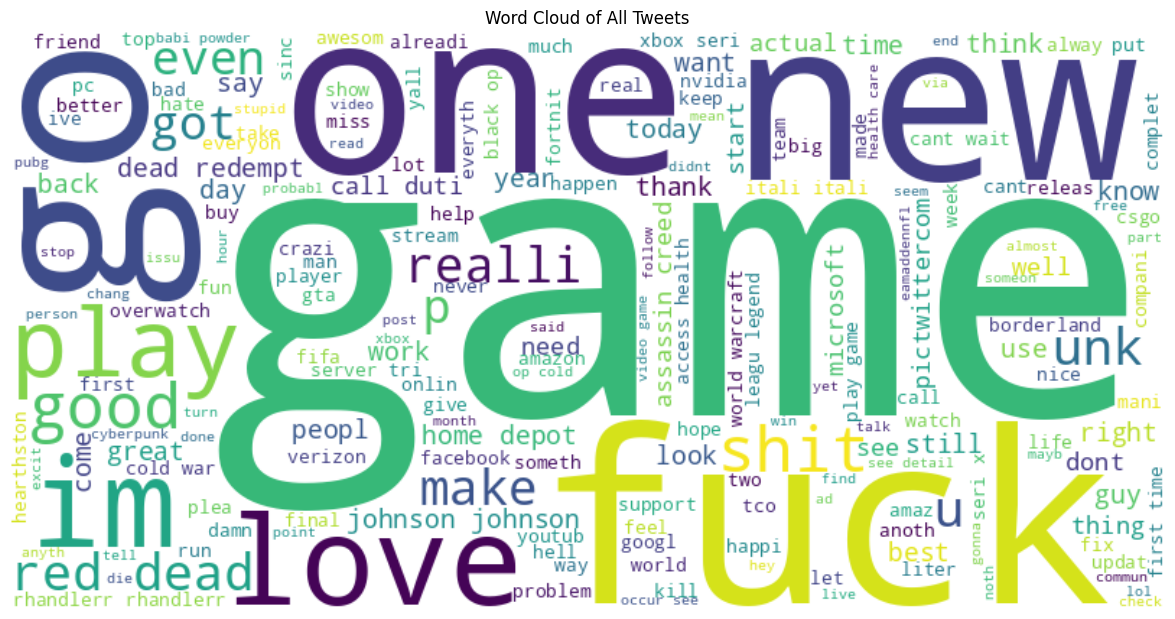

In [ ]:
from wordcloud import WordCloud

# Generating a word cloud

# Combine all cleaned tweets into one string
text = ' '.join(twitter_data['Cleaned_Tweet'])

# Generate a word cloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(15, 7.5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of All Tweets')
plt.show()

### MODEL TRAINING : STEP 5

In [ ]:
# Import logistic regression
from sklearn.linear_model import LogisticRegression


# Initialize the Logistic Regression model

# max_iter=1000: Sets the maximum number of iterations for the solver to converge.
# solver='saga': Suitable for large datasets and supports L1 regularization.
model = LogisticRegression(max_iter=1000, solver='saga')

# Training the Model: The model learns from the feature matrix X and target variable y.
# Fit the model on the entire dataset
model.fit(X, y)


LogisticRegression(max_iter=1000, solver='saga')

In [ ]:
from sklearn.model_selection import cross_val_score

# Alternative Model: SGDClassifier

# SGDClassifier: An alternative linear model that uses stochastic gradient descent.
#loss='log_loss': Specifies logistic regression.
# Advantages: Handles large datasets efficiently and works well with sparse data.

from sklearn.linear_model import SGDClassifier

# CROSS VALIDATION

#cross_val_score: Evaluates the model using cross-validation.
#cv=5: Uses 5-fold cross-validation.
#scoring='accuracy': Evaluates the model based on accuracy metric.
# Results: Provides an estimate of the model's performance on unseen data.


# Initialize the SGDClassifier
model = SGDClassifier(loss='log_loss', max_iter=1000, tol=1e-3)

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation accuracy:", cv_scores.mean())



Cross-validation scores: [0.51283784 0.46928847 0.42705588 0.39745929 0.49814177]
Mean cross-validation accuracy: 0.46095664791083407


### MODEL EVALUATIONS : STEP 6

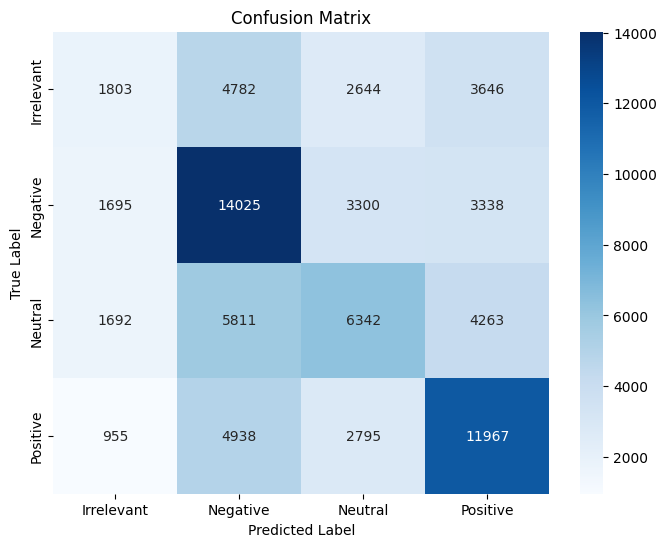

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Predict the sentiments using cross-validation predictions
from sklearn.model_selection import cross_val_predict

# cross_val_predict: Generates cross-validated predictions.
# confusion_matrix: Computes the confusion matrix to evaluate the accuracy of classifications.
# Visualization: Heatmap to display the confusion matrix.

# Get cross-validated predictions
y_pred = cross_val_predict(model, X, y, cv=5)

# Get the unique class labels from y
labels = np.unique(y)

# Compute the confusion matrix using the labels from y
conf_matrix = confusion_matrix(y, y_pred, labels=labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [ ]:
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict

# classification_report: Provides detailed metrics (precision, recall, F1-score) for each class.
#ross_val_predict: Generates cross-validated predictions.
# classification_report: Generates a classification report.

# Get cross-validated predictions
y_pred = cross_val_predict(model, X, y, cv=5)

# Generate the classification report
print("Classification Report:")
print(classification_report(y, y_pred))


Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.29      0.14      0.19     12875
    Negative       0.47      0.63      0.54     22358
     Neutral       0.43      0.35      0.38     18108
    Positive       0.52      0.58      0.55     20655

    accuracy                           0.46     73996
   macro avg       0.43      0.42      0.41     73996
weighted avg       0.44      0.46      0.44     73996



### MODEL INTERPRETATION : STEP 7

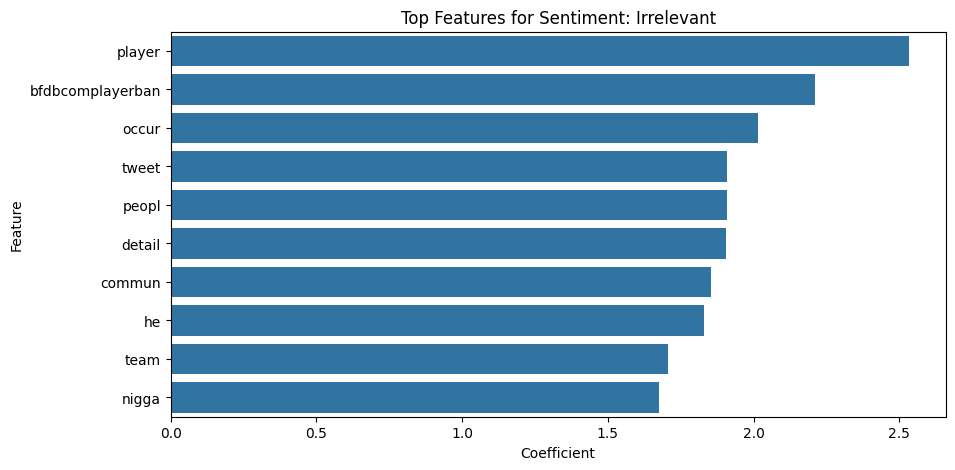

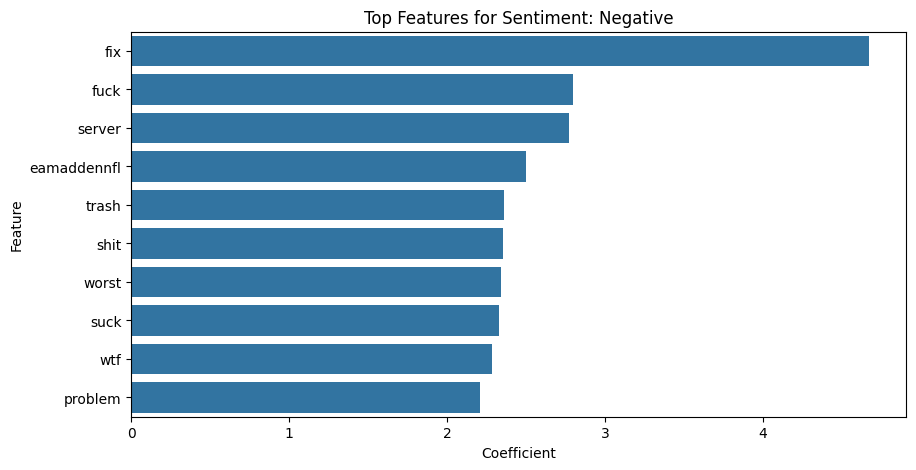

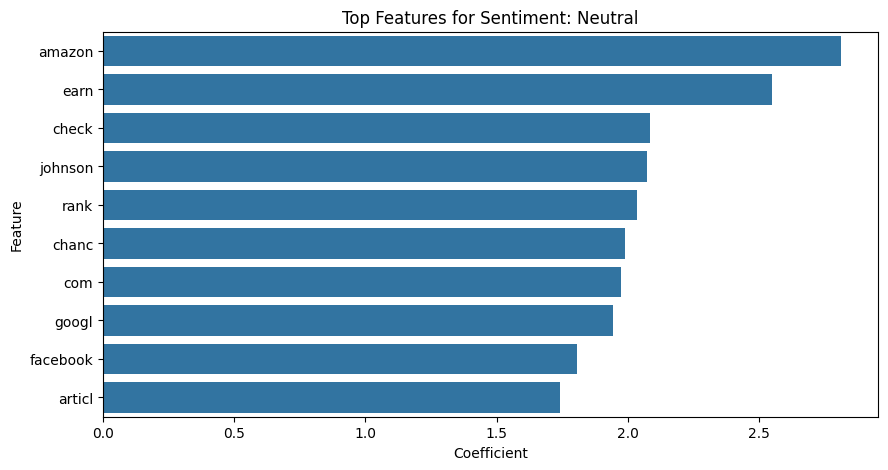

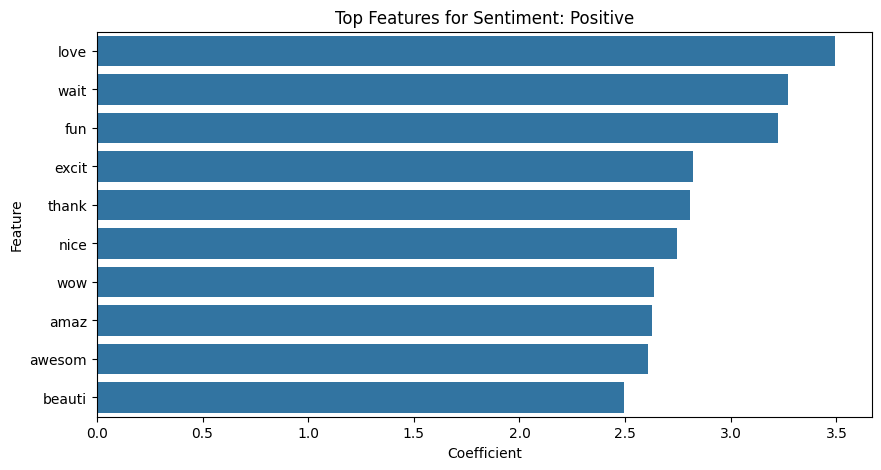

In [ ]:
# Fit the model on the entire dataset

# model.coef_: Retrieves the coefficients (weights) assigned to each feature by the model.
# Interpreting Coefficients: Higher positive coefficients indicate a stronger association with the class.
# Visualization: Bar plots showing the top features influencing each sentiment class.

model.fit(X, y)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing Top Features for Each Class
# Get feature names and coefficients
feature_names = vectorizer.get_feature_names_out()
coefficients = model.coef_

# For each class, visualize the top features - visualise the coefficients
for idx, class_label in enumerate(model.classes_):
    coef = coefficients[idx]
    coef_df = pd.DataFrame({
        'feature': feature_names,
        'coefficient': coef
    })
    # Get top positive coefficients
    top_features = coef_df.sort_values(by='coefficient', ascending=False).head(10)

    plt.figure(figsize=(10, 5))
    sns.barplot(x='coefficient', y='feature', data=top_features)
    plt.title(f'Top Features for Sentiment: {class_label}')
    plt.xlabel('Coefficient')
    plt.ylabel('Feature')
    plt.show()


## NLP (3) simpletransformes approach (TRAINS SLOW, PRODUCES HUGE SLOW MODELS)


In [ ]:
import torch

if torch.cuda.is_available():
    print("CUDA is available. Running predictions on GPU.")
else:
    print("CUDA is not available. Running predictions on CPU.")

CUDA is available. Running predictions on GPU.


In [ ]:
df_nlp1 = df.copy()
# Separate labeled and unlabeled data

df_nlp1 = df_nlp1.dropna(subset=['review'])
df_nlp1.isnull().sum()

df.drop_duplicates(inplace=True)

df_nlp1['review'] = df_nlp1['review'].str.lower()
df_nlp1['sentiment'] = df_nlp1['sentiment'].str.lower()

# make half of rows nan for review feature
df_nlp1['sentiment'] = df_nlp1['sentiment'].apply(lambda x: np.nan if np.random.rand() < 0.5 else x)

In [ ]:
chat_word = {
    'AFAIK': 'As Far As I Know',
    'AFK': 'Away From Keyboard',
    'ASAP': 'As Soon As Possible',
    'ATK': 'At The Keyboard',
    'ATM': 'At The Moment',
    'A3': 'Anytime, Anywhere, Anyplace',
    'BAK': 'Back At Keyboard',
    'BBL': 'Be Back Later',
    'BBS': 'Be Back Soon',
    'BFN': 'Bye For Now',
    'B4N': 'Bye For Now',
    'BRB': 'Be Right Back',
    'BRT': 'Be Right There',
    'BTW': 'By The Way',
    'B4': 'Before',
    'CU': 'See You',
    'CUL8R': 'See You Later',
    'CYA': 'See You',
    'FAQ': 'Frequently Asked Questions',
    'FC': 'Fingers Crossed',
    'FWIW': "For What It's Worth",
    'FYI': 'For Your Information',
    'GAL': 'Get A Life',
    'GG': 'Good Game',
    'GN': 'Good Night',
    'GMTA': 'Great Minds Think Alike',
    'GR8': 'Great!',
    'G9': 'Genius',
    'IC': 'I See',
    'ICQ': 'I Seek you (also a chat program)',
    'ILU': 'ILU: I Love You',
    'IMHO': 'In My Honest/Humble Opinion',
    'IMO': 'In My Opinion',
    'IOW': 'In Other Words',
    'IRL': 'In Real Life',
    'KISS': 'Keep It Simple, Stupid',
    'LDR': 'Long Distance Relationship',
    'LMAO': 'Laugh My A.. Off',
    'LOL': 'Laughing Out Loud',
    'LTNS': 'Long Time No See',
    'L8R': 'Later',
    'MTE': 'My Thoughts Exactly',
    'M8': 'Mate',
    'NRN': 'No Reply Necessary',
    'OIC': 'Oh I See',
    'PITA': 'Pain In The A..',
    'PRT': 'Party',
    'PRW': 'Parents Are Watching',
    'QPSA?': 'Que Pasa?',
    'ROFL': 'Rolling On The Floor Laughing',
    'ROFLOL': 'Rolling On The Floor Laughing Out Loud',
    'ROTFLMAO': 'Rolling On The Floor Laughing My A.. Off',
    'SK8': 'Skate',
    'STATS': 'Your sex and age',
    'ASL': 'Age, Sex, Location',
    'THX': 'Thank You',
    'TTFN': 'Ta-Ta For Now!',
    'TTYL': 'Talk To You Later',
    'U': 'You',
    'U2': 'You Too',
    'U4E': 'Yours For Ever',
    'WB': 'Welcome Back',
    'WTF': 'What The F...',
    'WTG': 'Way To Go!',
    'WUF': 'Where Are You From?',
    'W8': 'Wait...',
    '7K': 'Sick:-D Laugher',
    'TFW': 'That feeling when',
    'MFW': 'My face when',
    'MRW': 'My reaction when',
    'IFYP': 'I feel your pain',
    'TNTL': 'Trying not to laugh',
    'JK': 'Just kidding',
    'IDC': "I don't care",
    'ILY': 'I love you',
    'IMU': 'I miss you',
    'ADIH': 'Another day in hell',
    'ZZZ': 'Sleeping, bored, tired',
    'WYWH': 'Wish you were here',
    'TIME': 'Tears in my eyes',
    'BAE': 'Before anyone else',
    'FIMH': 'Forever in my heart',
    'BSAAW': 'Big smile and a wink',
    'BWL': 'Bursting with laughter',
    'BFF': 'Best friends forever',
    'CSL': "Can't stop laughing"
}


def short_conv(text):
    new_text = []
    for w in text.split():
        if w.upper() in chat_word:
            new_text.append(chat_word[w.upper()])
        else:
            new_text.append(w)
    return " ".join(new_text)

df_nlp1['review'] = df_nlp1['review'].apply(short_conv)
df_nlp1

,id,game,sentiment,review
34877,6792,Fortnite,irrelevant,went to go in george's room to find his door w...
21704,4115,CS-GO,positive,yo this looks lit! team:go/overwatch combo
47008,5665,HomeDepot,NaN,pay attention executive administrators. while ...
7969,9369,Overwatch,irrelevant,guy looked at me and says my name was put on t...
454,2476,Borderlands,NaN,one
...,...,...,...,...
37194,8379,Microsoft,neutral,microsoft opens data on the threat of the coro...
6265,278,Amazon,neutral,"fast, exciting, and unique! take a copy of mur..."
54886,2225,CallOfDuty,NaN,what fr this wit a warzone if you beefing dont...
860,2552,Borderlands,negative,borderlands 3 sucks why are yall giving money ...


In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

from nltk.corpus import stopwords
def remove_stopwords(text):
    new_text=[]
    for word in text.split():
        if word in stopwords.words('english'):
            new_text.append('')
        else:
            new_text.append(word)

    x=new_text[:]
    new_text.clear()
    return " ".join(x)


df_nlp1['review'] = df_nlp1['review'].apply(remove_stopwords)
df_nlp1

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/arslanruslan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,id,game,sentiment,review
34877,6792,Fortnite,irrelevant,went go george's room find door locked? c...
21704,4115,CS-GO,positive,yo looks lit! team:go/overwatch combo
47008,5665,HomeDepot,NaN,pay attention executive administrators. stor...
7969,9369,Overwatch,irrelevant,guy looked says name put throw list lma...
454,2476,Borderlands,NaN,one
...,...,...,...,...
37194,8379,Microsoft,neutral,microsoft opens data threat corona virus ...
6265,278,Amazon,neutral,"fast, exciting, unique! take copy murder p..."
54886,2225,CallOfDuty,NaN,fr wit warzone beefing dont outside wit ...
860,2552,Borderlands,negative,borderlands 3 sucks yall giving money randy...


In [ ]:
import re
def remove_emoji(text):
    emoji_pattern=re.compile("["
                             u"\U0001F600-\U0001F64F" #emoticons
                             u"\U0001F300-\U0001F5FF" #symbols, pictograph
                              u"\U0001F680-\U0001F6FF" #transport and map symbol
                              u"\U0001F1E0-\U0001F1FF" # flags(IOS)
                              u"\U00002702-\U000027B0"
                              u"\U00002FC2-\U0001F251"
                             "]+",flags=re.UNICODE)
    return emoji_pattern.sub(r'',text)

df_nlp1['review'] = df_nlp1['review'].apply(remove_emoji)
df_nlp1

,id,game,sentiment,review
34877,6792,Fortnite,irrelevant,went go george's room find door locked? c...
21704,4115,CS-GO,positive,yo looks lit! team:go/overwatch combo
47008,5665,HomeDepot,NaN,pay attention executive administrators. stor...
7969,9369,Overwatch,irrelevant,guy looked says name put throw list lma...
454,2476,Borderlands,NaN,one
...,...,...,...,...
37194,8379,Microsoft,neutral,microsoft opens data threat corona virus ...
6265,278,Amazon,neutral,"fast, exciting, unique! take copy murder p..."
54886,2225,CallOfDuty,NaN,fr wit warzone beefing dont outside wit ...
860,2552,Borderlands,negative,borderlands 3 sucks yall giving money randy...


In [ ]:
from nltk.stem.porter import PorterStemmer
stop_words = set(stopwords.words('english'))
ps=PorterStemmer()
def stem_words(text):
    return " ".join([ps.stem(word) for word in text.split()])

df_nlp1['review'] = df_nlp1['review'].apply(stem_words)
df_nlp1

,id,game,sentiment,review
34877,6792,Fortnite,irrelevant,went go george' room find door locked? climb s...
21704,4115,CS-GO,positive,yo look lit! team:go/overwatch combo
47008,5665,HomeDepot,NaN,pay attent execut administrators. store take d...
7969,9369,Overwatch,irrelevant,guy look say name put throw list lmaoooo get f...
454,2476,Borderlands,NaN,one
...,...,...,...,...
37194,8379,Microsoft,neutral,microsoft open data threat corona viru public ...
6265,278,Amazon,neutral,"fast, exciting, unique! take copi murder preac..."
54886,2225,CallOfDuty,NaN,fr wit warzon beef dont outsid wit blick point...
860,2552,Borderlands,negative,borderland 3 suck yall give money randi pitchf...


In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')
def lemmanitization(text):
  sentence = "The children were playing in the park, running and laughing as they enjoyed their freedom, unaware of the time passing quickly by."
  doc = nlp(sentence)

  print("Original Word - Lemmatized Word")
  for token in doc:
      print(f"{token.text} - {token.lemma_}")

df_nlp1['review'] = df_nlp1['review'].apply(lemmanitization)

ImportError: cannot import name 'get_terminal_size' from 'click.termui' (/home/arslanruslan/.local/lib/python3.10/site-packages/click/termui.py)

In [ ]:
def tokenize(text):
  # Tokenize the text
  tokens = text.split()
  # Remove stopwords and apply stemming
  tokens = [ps.stem(word) for word in tokens if word not in stop_words]

df_nlp1['review'] = df_nlp1['review'].apply(tokenize)
df_nlp1

,id,game,sentiment,review
34877,6792,Fortnite,irrelevant,None
21704,4115,CS-GO,positive,None
47008,5665,HomeDepot,NaN,None
7969,9369,Overwatch,irrelevant,None
454,2476,Borderlands,NaN,None
...,...,...,...,...
37194,8379,Microsoft,neutral,None
6265,278,Amazon,neutral,None
54886,2225,CallOfDuty,NaN,None
860,2552,Borderlands,negative,None


In [ ]:
labeled_data = df_nlp1.dropna(subset=['sentiment'])
unlabeled_data = df_nlp1[df_nlp1['sentiment'].isna()]

In [ ]:
labeled_data

,id,game,sentiment,review
34877,6792,Fortnite,irrelevant,None
21704,4115,CS-GO,positive,None
7969,9369,Overwatch,irrelevant,None
58076,11558,TomClancysRainbowSix,negative,None
39653,1208,Battlefield,irrelevant,None
...,...,...,...,...
41090,1451,Battlefield,neutral,None
37194,8379,Microsoft,neutral,None
6265,278,Amazon,neutral,None
860,2552,Borderlands,negative,None


In [ ]:
unlabeled_data

,id,game,sentiment,review
47008,5665,HomeDepot,NaN,None
454,2476,Borderlands,NaN,None
51601,10458,RedDeadRedemption(RDR),NaN,None
23819,4482,Google,NaN,None
3235,1762,CallOfDutyBlackopsColdWar,NaN,None
...,...,...,...,...
67221,7111,johnson&johnson,NaN,None
16023,3142,Dota2,NaN,None
60263,3527,Facebook,NaN,None
44131,10379,PlayerUnknownsBattlegrounds(PUBG),NaN,None


In [ ]:
from sklearn.model_selection import train_test_split
from simpletransformers.classification import ClassificationModel

# Split labeled data into train and validation sets
# train_df, eval_df = train_test_split(labeled_data, test_size=0.2, random_state=42)

# Initialize the model

# model = ClassificationModel('bert', 'bert-base-uncased', num_labels=4, use_cuda=False)

model_args = {
    "num_train_epochs": 1,  # Start with 1 epoch, and increase if needed
    "train_batch_size": 4,  # Try lower values if running out of memory
    "fp16": True,
    "logging_steps": 10,
    "overwrite_output_dir": True,
    "reprocess_input_data": False,  # Avoids reprocessing if cache exists
    "cache_dir": "~/cache_dir",
    "use_cached_eval_features": True,
    # There seems to be an issue with "use_multiprocessing": True when gpu-cuda is enable.
    "use_multiprocessing": True
}


# use cuda if you have nVidia GPU
model = ClassificationModel('bert', 'bert-base-uncased', num_labels=4, use_cuda=False, args=model_args)

# smaller model
# model = ClassificationModel('distilbert', 'distilbert-base-uncased', num_labels=4, use_cuda=True, args=model_args)


label_mapping = {'positive': 1, 'negative': 0, 'irrelevant':2, 'neutral':3}  # Customize based on your labels
labeled_data['label'] = labeled_data['sentiment'].map(label_mapping)

# drop id game and sentiment columns
labeled_data_to_train_on = labeled_data.drop(['id', 'game', 'review'], axis=1)
labeled_data_to_train_on.columns = ['text', 'label']
labeled_data_to_train_on


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipykernel_4885/3216046855.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labeled_data['label'] = labeled_data['sentiment'].map(label_mapping)


,text,label
34877,irrelevant,2
21704,positive,1
7969,irrelevant,2
58076,negative,0
39653,irrelevant,2
...,...,...
41090,neutral,3
37194,neutral,3
6265,neutral,3
860,negative,0


In [ ]:
# from transformers import BertTokenizer
# import torch

# tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# # Tokenize the data and save as tensor for future reuse
# encoded_inputs = tokenizer(
#     unlabeled_data_to_predict_on['review'].tolist(),
#     padding=True,
#     truncation=True,
#     max_length=512,
#     return_tensors="pt"
# )
# torch.save(encoded_inputs, "tokenized_data.pt")

In [ ]:
# Load pre-tokenized data
encoded_inputs = torch.load("tokenized_data.pt")

# Ensure CUDA is used if available
if torch.cuda.is_available():
    encoded_inputs = {k: v.to("cuda") for k, v in encoded_inputs.items()}

/tmp/ipykernel_4885/2705409828.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  encoded_inputs = torch.load("tokenized_data.pt")


In [ ]:
labeled_data_to_train_on = labeled_data_to_train_on.sample(frac=0.01)
labeled_data_to_train_on

,text,label
1940,negative,0
64668,negative,0
1242,negative,0
57648,negative,0
36097,neutral,3
...,...,...
32163,negative,0
50407,irrelevant,2
70785,negative,0
7568,negative,0


In [ ]:
import logging
logging.basicConfig(level=logging.INFO)

model.train_model(labeled_data_to_train_on)

/home/arslanruslan/.local/lib/python3.10/site-packages/simpletransformers/classification/classification_model.py:610: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(
/home/arslanruslan/.local/lib/python3.10/site-packages/simpletransformers/classification/classification_utils.py:204: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serial

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 1 of 1:   0%|          | 0/90 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model: Training of bert model complete. Saved to outputs/.


(90, 1.3476684027247958)

In [ ]:
unlabeled_data = df_nlp1[df_nlp1['sentiment'].isna()]
unlabeled_data = unlabeled_data.drop(['id', 'game', 'sentiment'], axis=1)
unlabeled_data.columns = ['text']
unlabeled_data

,text
34877,went to go in george's room to find his door w...
7969,guy looked at me and says my name was put on t...
58076,@rainbow6game server are available in xbox 🥺
39653,a ban for battlefield 4 player lilcoldlli has ...
51601,lmao gason might kill me for this
...,...
769,@ borderlands echo cast doesn't work for me ev...
67221,nurses who have been caring hard for all hiv a...
16023,top 3 offlaners in 7. x 27d to 7 raise mmr in ...
6265,"fast, exciting, and unique! take a copy of mur..."


In [ ]:
# Generate predictions for the unlabeled data
unlabeled_data_to_predict_on = unlabeled_data.sample(frac=0.01)
unlabeled_data_to_predict_on

,text
30632,omg wt* tf drafted to enemy base ball
25583,@scrabble_ea i keep getting message about your...
49078,@eahelp i just bought 15:99 of fifa with cash ...
66108,"if we just wait for the vaccine, it will take ..."
64920,84.... i hate @ eamaddennfl
...,...
32918,guys thanks team @luis26098388 for making my f...
25165,@ jukinmedia youtube.com / watch? v = j5ms4g.....
55856,call of reason logic: nerfs the m4 7 s.. keeps...
22422,i miss csgo


In [ ]:
# unlabeled_data_to_predict_on['label'] = model.predict(unlabeled_data_to_predict_on['review'].tolist())[0]
# unlabeled_data_to_predict_on

In [ ]:
def batched_prediction(model, data, batch_size=10):
    predictions = []
    num_batches = len(data) // batch_size + (1 if len(data) % batch_size != 0 else 0)

    for i in range(num_batches):
        start = i * batch_size
        end = start + batch_size
        batch_data = data[start:end]

        # Make predictions on the current batch
        batch_predictions = model.predict(batch_data)[0]
        predictions.extend(batch_predictions)

        # Log progress
        print(f"Processed batch {i+1}/{num_batches} ({end if end < len(data) else len(data)}/{len(data)})")

    return predictions

import os

# os.environ["TOKENIZERS_PARALLELISM"] = "false"

unlabeled_reviews = unlabeled_data_to_predict_on['text'].tolist()
predictions = batched_prediction(model, unlabeled_reviews, batch_size=10)

unlabeled_data_width_predictions = unlabeled_data_to_predict_on.copy()
unlabeled_data_width_predictions['label'] = predictions
unlabeled_data_width_predictions

INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


Processed batch 1/38 (10/371)


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


Processed batch 2/38 (20/371)


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


Processed batch 3/38 (30/371)


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


Processed batch 4/38 (40/371)


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


Processed batch 5/38 (50/371)


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


Processed batch 6/38 (60/371)


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


Processed batch 7/38 (70/371)


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


Processed batch 8/38 (80/371)


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


Processed batch 9/38 (90/371)


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


Processed batch 10/38 (100/371)


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


Processed batch 11/38 (110/371)


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


Processed batch 12/38 (120/371)


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


Processed batch 13/38 (130/371)


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


Processed batch 14/38 (140/371)


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


Processed batch 15/38 (150/371)


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


Processed batch 16/38 (160/371)


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


Processed batch 17/38 (170/371)


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


Processed batch 18/38 (180/371)


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


Processed batch 19/38 (190/371)


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


Processed batch 20/38 (200/371)


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


Processed batch 21/38 (210/371)


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


Processed batch 22/38 (220/371)


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


Processed batch 23/38 (230/371)


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


Processed batch 24/38 (240/371)


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


Processed batch 25/38 (250/371)


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


Processed batch 26/38 (260/371)


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


Processed batch 27/38 (270/371)


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


Processed batch 28/38 (280/371)


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


Processed batch 29/38 (290/371)


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


Processed batch 30/38 (300/371)


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


Processed batch 31/38 (310/371)


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


Processed batch 32/38 (320/371)


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


Processed batch 33/38 (330/371)


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


Processed batch 34/38 (340/371)


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


Processed batch 35/38 (350/371)


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


Processed batch 36/38 (360/371)


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


Processed batch 37/38 (370/371)


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Processed batch 38/38 (371/371)


,text,label
30632,omg wt* tf drafted to enemy base ball,0
25583,@scrabble_ea i keep getting message about your...,0
49078,@eahelp i just bought 15:99 of fifa with cash ...,0
66108,"if we just wait for the vaccine, it will take ...",0
64920,84.... i hate @ eamaddennfl,0
...,...,...
32918,guys thanks team @luis26098388 for making my f...,0
25165,@ jukinmedia youtube.com / watch? v = j5ms4g.....,0
55856,call of reason logic: nerfs the m4 7 s.. keeps...,0
22422,i miss csgo,0


In [ ]:
unlabeled_data_width_predictions.head(100)
# filter where label no 0
test = unlabeled_data_width_predictions[unlabeled_data_width_predictions['label'] != 0]
test

# {'positive': 1, 'negative': 0, 'irrelevant':2, 'neutral':3}

,text,label
11089,i love it!!!.,1
39889,pew pew pew battlefield v com tlw!!! live do l...,3
68005,yes! i love the world of.,1
42476,best among us moments ever <unk> via daily fnb...,3
23910,i love it! steven (@ vancouvergeek) has tested...,3
...,...,...
59268,"superbly, thank you.",1
42173,ended up playing pubg and not doing my assgn p...,3
39191,@hstopdecks @ahirunhs @neon31hs. . got back i...,3
44134,pubg banned at a n to unban pubg 100% working ...,3


In [ ]:
combined_data = pd.concat([labeled_data_to_train_on, unlabeled_data_width_predictions])
combined_data

,text,label
8856,neutral,3
22247,neutral,3
25355,negative,0
3732,positive,1
41517,irrelevant,2
...,...,...
32918,guys thanks team @luis26098388 for making my f...,0
25165,@ jukinmedia youtube.com / watch? v = j5ms4g.....,0
55856,call of reason logic: nerfs the m4 7 s.. keeps...,0
22422,i miss csgo,0


In [ ]:
model.train_model(combined_data)

/home/arslanruslan/.local/lib/python3.10/site-packages/simpletransformers/classification/classification_model.py:610: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(
/home/arslanruslan/.local/lib/python3.10/site-packages/simpletransformers/classification/classification_utils.py:204: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serial

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 1 of 1:   0%|          | 0/90 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model: Training of bert model complete. Saved to outputs/.


(90, 1.1608388152387408)

In [ ]:
result, model_outputs, wrong_predictions = model.eval_model(eval_df)
print(result)

NameError: name 'eval_df' is not defined

In [ ]:
# save model
import pickle
with open('/mnt/c/Projects/shinysht/project3/models/nlp_model', 'wb') as file:
    pickle.dump(model, file)

## NLP APPROACH (figuring out full pipeline) (unfinished)

Lower case the reviews

In [ ]:
df_nlp3 = df.copy()
df_nlp3['review'] = df_nlp3['review'].str.lower()
df_nlp3

,id,game,sentiment,review
34877,6792,Fortnite,Irrelevant,went to go in george's room to find his door w...
21704,4115,CS-GO,Positive,yo this looks lit! team:go/overwatch combo
47008,5665,HomeDepot,Negative,pay attention executive administrators. while ...
7969,9369,Overwatch,Irrelevant,guy looked at me and says my name was put on t...
454,2476,Borderlands,Positive,one
...,...,...,...,...
37194,8379,Microsoft,Neutral,microsoft opens data on the threat of the coro...
6265,278,Amazon,Neutral,"fast, exciting, and unique! take a copy of mur..."
54886,2225,CallOfDuty,Negative,what fr this wit a warzone if you beefing dont...
860,2552,Borderlands,Negative,borderlands 3 sucks why are yall giving money ...


In [ ]:
import re
def remove_html_tags(text):
    pattern = re.compile('<.*?>')
    return pattern.sub("", str(text))

df_nlp3['review']=df_nlp3['review'].apply(remove_html_tags)
df_nlp3

,id,game,sentiment,review
34877,6792,Fortnite,Irrelevant,went to go in george's room to find his door w...
21704,4115,CS-GO,Positive,yo this looks lit! team:go/overwatch combo
47008,5665,HomeDepot,Negative,pay attention executive administrators. while ...
7969,9369,Overwatch,Irrelevant,guy looked at me and says my name was put on t...
454,2476,Borderlands,Positive,one
...,...,...,...,...
37194,8379,Microsoft,Neutral,microsoft opens data on the threat of the coro...
6265,278,Amazon,Neutral,"fast, exciting, and unique! take a copy of mur..."
54886,2225,CallOfDuty,Negative,what fr this wit a warzone if you beefing dont...
860,2552,Borderlands,Negative,borderlands 3 sucks why are yall giving money ...


In [ ]:
import string,time
string.punctuation

exclude=string.punctuation
def remove_punc(text):
    for char in exclude:
        text=text.replace(char,'')
    return text

df_nlp3['review'] = df_nlp3['review'].apply(remove_punc)
df_nlp3

,id,game,sentiment,review
34877,6792,Fortnite,Irrelevant,went to go in georges room to find his door wa...
21704,4115,CS-GO,Positive,yo this looks lit teamgooverwatch combo
47008,5665,HomeDepot,Negative,pay attention executive administrators while y...
7969,9369,Overwatch,Irrelevant,guy looked at me and says my name was put on t...
454,2476,Borderlands,Positive,one
...,...,...,...,...
37194,8379,Microsoft,Neutral,microsoft opens data on the threat of the coro...
6265,278,Amazon,Neutral,fast exciting and unique take a copy of murder...
54886,2225,CallOfDuty,Negative,what fr this wit a warzone if you beefing dont...
860,2552,Borderlands,Negative,borderlands 3 sucks why are yall giving money ...


In [ ]:
chat_word = {
    'AFAIK': 'As Far As I Know',
    'AFK': 'Away From Keyboard',
    'ASAP': 'As Soon As Possible',
    'ATK': 'At The Keyboard',
    'ATM': 'At The Moment',
    'A3': 'Anytime, Anywhere, Anyplace',
    'BAK': 'Back At Keyboard',
    'BBL': 'Be Back Later',
    'BBS': 'Be Back Soon',
    'BFN': 'Bye For Now',
    'B4N': 'Bye For Now',
    'BRB': 'Be Right Back',
    'BRT': 'Be Right There',
    'BTW': 'By The Way',
    'B4': 'Before',
    'CU': 'See You',
    'CUL8R': 'See You Later',
    'CYA': 'See You',
    'FAQ': 'Frequently Asked Questions',
    'FC': 'Fingers Crossed',
    'FWIW': "For What It's Worth",
    'FYI': 'For Your Information',
    'GAL': 'Get A Life',
    'GG': 'Good Game',
    'GN': 'Good Night',
    'GMTA': 'Great Minds Think Alike',
    'GR8': 'Great!',
    'G9': 'Genius',
    'IC': 'I See',
    'ICQ': 'I Seek you (also a chat program)',
    'ILU': 'ILU: I Love You',
    'IMHO': 'In My Honest/Humble Opinion',
    'IMO': 'In My Opinion',
    'IOW': 'In Other Words',
    'IRL': 'In Real Life',
    'KISS': 'Keep It Simple, Stupid',
    'LDR': 'Long Distance Relationship',
    'LMAO': 'Laugh My A.. Off',
    'LOL': 'Laughing Out Loud',
    'LTNS': 'Long Time No See',
    'L8R': 'Later',
    'MTE': 'My Thoughts Exactly',
    'M8': 'Mate',
    'NRN': 'No Reply Necessary',
    'OIC': 'Oh I See',
    'PITA': 'Pain In The A..',
    'PRT': 'Party',
    'PRW': 'Parents Are Watching',
    'QPSA?': 'Que Pasa?',
    'ROFL': 'Rolling On The Floor Laughing',
    'ROFLOL': 'Rolling On The Floor Laughing Out Loud',
    'ROTFLMAO': 'Rolling On The Floor Laughing My A.. Off',
    'SK8': 'Skate',
    'STATS': 'Your sex and age',
    'ASL': 'Age, Sex, Location',
    'THX': 'Thank You',
    'TTFN': 'Ta-Ta For Now!',
    'TTYL': 'Talk To You Later',
    'U': 'You',
    'U2': 'You Too',
    'U4E': 'Yours For Ever',
    'WB': 'Welcome Back',
    'WTF': 'What The F...',
    'WTG': 'Way To Go!',
    'WUF': 'Where Are You From?',
    'W8': 'Wait...',
    '7K': 'Sick:-D Laugher',
    'TFW': 'That feeling when',
    'MFW': 'My face when',
    'MRW': 'My reaction when',
    'IFYP': 'I feel your pain',
    'TNTL': 'Trying not to laugh',
    'JK': 'Just kidding',
    'IDC': "I don't care",
    'ILY': 'I love you',
    'IMU': 'I miss you',
    'ADIH': 'Another day in hell',
    'ZZZ': 'Sleeping, bored, tired',
    'WYWH': 'Wish you were here',
    'TIME': 'Tears in my eyes',
    'BAE': 'Before anyone else',
    'FIMH': 'Forever in my heart',
    'BSAAW': 'Big smile and a wink',
    'BWL': 'Bursting with laughter',
    'BFF': 'Best friends forever',
    'CSL': "Can't stop laughing"
}


def short_conv(text):
    new_text = []
    for w in text.split():
        if w.upper() in chat_word:
            new_text.append(chat_word[w.upper()])
        else:
            new_text.append(w)
    return " ".join(new_text)

df_nlp3['review'] = df_nlp3['review'].apply(short_conv)
df_nlp3

,id,game,sentiment,review
34877,6792,Fortnite,Irrelevant,went to go in georges room to find his door wa...
21704,4115,CS-GO,Positive,yo this looks lit teamgooverwatch combo
47008,5665,HomeDepot,Negative,pay attention executive administrators while y...
7969,9369,Overwatch,Irrelevant,guy looked at me and says my name was put on t...
454,2476,Borderlands,Positive,one
...,...,...,...,...
37194,8379,Microsoft,Neutral,microsoft opens data on the threat of the coro...
6265,278,Amazon,Neutral,fast exciting and unique take a copy of murder...
54886,2225,CallOfDuty,Negative,what fr this wit a warzone if you beefing dont...
860,2552,Borderlands,Negative,borderlands 3 sucks why are yall giving money ...


In [ ]:
from nltk.corpus import stopwords
def remove_stopwords(text):
    new_text=[]
    for word in text.split():
        if word in stopwords.words('english'):
            new_text.append('')
        else:
            new_text.append(word)

    x=new_text[:]
    new_text.clear()
    return " ".join(x)


df_nlp3['review'] = df_nlp3['review'].apply(remove_stopwords)
df_nlp3

In [ ]:
import re
def remove_emoji(text):
    emoji_pattern=re.compile("["
                             u"\U0001F600-\U0001F64F" #emoticons
                             u"\U0001F300-\U0001F5FF" #symbols, pictograph
                              u"\U0001F680-\U0001F6FF" #transport and map symbol
                              u"\U0001F1E0-\U0001F1FF" # flags(IOS)
                              u"\U00002702-\U000027B0"
                              u"\U00002FC2-\U0001F251"
                             "]+",flags=re.UNICODE)
    return emoji_pattern.sub(r'',text)

df_nlp3['review'] = df_nlp3['review'].apply(remove_emoji)
df_nlp3

,id,game,sentiment,review
34877,6792,Fortnite,Irrelevant,went to go in georges room to find his door wa...
21704,4115,CS-GO,Positive,yo this looks lit teamgooverwatch combo
47008,5665,HomeDepot,Negative,pay attention executive administrators while y...
7969,9369,Overwatch,Irrelevant,guy looked at me and says my name was put on t...
454,2476,Borderlands,Positive,one
...,...,...,...,...
37194,8379,Microsoft,Neutral,microsoft opens data on the threat of the coro...
6265,278,Amazon,Neutral,fast exciting and unique take a copy of murder...
54886,2225,CallOfDuty,Negative,what fr this wit a warzone if you beefing dont...
860,2552,Borderlands,Negative,borderlands 3 sucks why are yall giving money ...


In [ ]:
from nltk.stem.porter import PorterStemmer

ps=PorterStemmer()
def stem_words(text):
    return " ".join([ps.stem(word) for word in text.split()])

sample="Walk walking walked walks"

df_nlp3['review'] = df_nlp3['review'].apply(stem_words)
df_nlp3

,id,game,sentiment,review
34877,6792,Fortnite,Irrelevant,went to go in georg room to find hi door wa lo...
21704,4115,CS-GO,Positive,yo thi look lit teamgooverwatch combo
47008,5665,HomeDepot,Negative,pay attent execut administr while your store a...
7969,9369,Overwatch,Irrelevant,guy look at me and say my name wa put on the t...
454,2476,Borderlands,Positive,one
...,...,...,...,...
37194,8379,Microsoft,Neutral,microsoft open data on the threat of the coron...
6265,278,Amazon,Neutral,fast excit and uniqu take a copi of murder and...
54886,2225,CallOfDuty,Negative,what fr thi wit a warzon if you beef dont an o...
860,2552,Borderlands,Negative,borderland 3 suck whi are yall give money to r...


In [ ]:
import spacy

nlp = spacy.load('en_core_web_sm')

def lemmanitization(text):
  sentence = "The children were playing in the park, running and laughing as they enjoyed their freedom, unaware of the time passing quickly by."
  doc = nlp(sentence)

  print("Original Word - Lemmatized Word")
  for token in doc:
      print(f"{token.text} - {token.lemma_}")

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

data = {
    'ID': [1, 2, 3, 4, 5],
    'Color': ['Red', 'Green', 'Blue', 'Green', 'Blue']
}

df = pd.DataFrame(data)

encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(df[['Color']])
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(['Color']))
final_df = pd.concat([df, encoded_df], axis=1)

print("Original DataFrame:")
print(df)
print("\nOne-Hot Encoded DataFrame:")
print(final_df)

## CONVERT COLLAB TO PDF

In [ ]:
!pip install nbconvert

# sometimes it might say its satisfied but not work then we can run this
!pip install --force-reinstall nbconvert

WSL you need to run to install libs

$ sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic

In [ ]:
!jupyter nbconvert --to pdf "/mnt/c/Projects/project3.ipynb"

[NbConvertApp] Converting notebook /mnt/c/Projects/project3.ipynb to pdf
[NbConvertApp] Support files will be in project3_files/
[NbConvertApp] Making directory ./project3_files
[NbConvertApp] Writing 267298 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 1669036 bytes to /mnt/c/Projects/project3.pdf


In [ ]:
!jupyter nbconvert --to pdf "/Users/aabakarov/project3.ipynb"